# 환경 설정

In [2]:
import pycaret
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import missingno as msno
import os
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["font.size"]=12
plt.rcParams["figure.figsize"]=(14,4)
mpl.rcParams["axes.unicode_minus"]=False

import time
import statsmodels.api as sm

In [3]:
import os

if os.name=='nt':
    plt.rc('font',family='Malgun Gothic')

In [4]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [7]:
df=pd.read_csv('datafile.csv',encoding='ANSI')

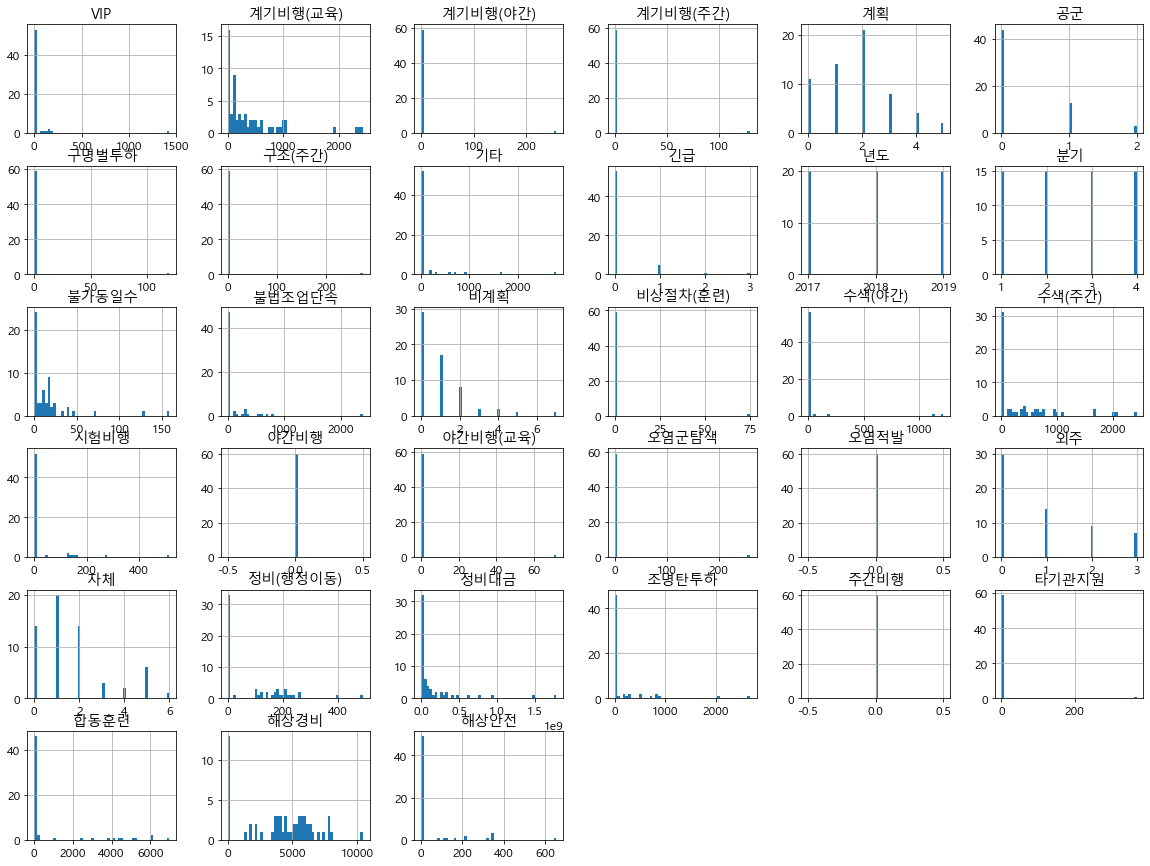

In [8]:
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15))
plt.show()

# 변수 스케일링

In [9]:
colnames=['정비대금',
       '불가동일수', 'VIP', '계기비행(교육)', '계기비행(야간)', '수색(주간)', '시험비행', '주간비행',
       '해상경비', '계기비행(주간)', '구명벌투하', '구조(주간)', '기타', '불법조업단속', '비상절차(훈련)',
       '수색(야간)', '야간비행', '야간비행(교육)', '오염군탐색', '오염적발', '정비(행정이동)', '조명탄투하',
       '타기관지원', '합동훈련', '해상안전']

In [10]:
df_cat=df.iloc[:,:10]
df_fl=df.iloc[:,10:]

## 1. Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

new_colnames=[i+'_ss' for i in colnames]
df_ss=pd.concat([df_cat,pd.DataFrame(scaler.fit_transform(df_fl[colnames]),columns=new_colnames)],axis=1)

## 2. MinMax Scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

new_colnames=[i+'_mms' for i in colnames]
df_mms=pd.concat([df_cat,pd.DataFrame(scaler.fit_transform(df_fl[colnames]),columns=new_colnames)],axis=1)

## 3. Robust Scaler

In [13]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

new_colnames=[i+'_rs' for i in colnames]
df_rs=pd.concat([df_cat,pd.DataFrame(scaler.fit_transform(df_fl[colnames]),columns=new_colnames)],axis=1)

# CN-235

In [14]:
# cn235 = df_scaler['기종'] == 'CN235'
# df_235 = df[cn235]

# AutoML

## 1. SS

In [30]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_ss,test_size=0.2,random_state=42)

In [76]:
from pycaret.regression import *
exp1=setup(train,target='정비대금_ss',train_size=0.8)

ValueError: Target parameter doesnt exist in the data provided.

In [32]:
best_5=compare_models(sort='R2',n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.3987,0.7910,0.5788,-3.9032,0.2210,0.7846,0.0180
catboost,CatBoost Regressor,0.4623,0.8055,0.6405,-9.9316,0.2649,0.8831,3.1440
lasso,Lasso Regression,0.4992,0.7668,0.6209,-10.7406,0.3474,1.0274,0.0090
lightgbm,Light Gradient Boosting Machine,0.4992,0.7668,0.6209,-10.7406,0.3474,1.0274,0.0120
en,Elastic Net,0.4992,0.7668,0.6209,-10.7406,0.3474,1.0274,0.0090
llar,Lasso Least Angle Regression,0.4992,0.7668,0.6209,-10.7406,0.3474,1.0274,0.0100
br,Bayesian Ridge,0.5063,0.7874,0.6436,-11.7789,0.3228,1.0657,0.0110
et,Extra Trees Regressor,0.5716,0.9788,0.7539,-15.2326,0.2867,1.4457,0.0890
rf,Random Forest Regressor,0.5365,0.9481,0.7507,-23.1952,0.3169,1.1074,0.1190
gbr,Gradient Boosting Regressor,0.5568,1.1095,0.8072,-32.3410,0.2797,1.2147,0.0280


In [34]:
knn=create_model('knn',cross_validation=False)
lasso=create_model('lasso',cross_validation=False)
llar=create_model('llar',cross_validation=False)
lightgbm=create_model('lightgbm',cross_validation=False)
en=create_model('en',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.206,3.4979,1.8703,-0.2005,0.7542,0.9147


In [40]:
tuned_knn=tune_model(knn,optimize='R2',n_iter=4)
tuned_en=tune_model(en,optimize='R2',n_iter=4)
tuned_llar=tune_model(llar,optimize='R2',n_iter=4)
tuned_lightgbm=tune_model(lightgbm,optimize='R2',n_iter=4)
tuned_lasso=tune_model(lasso,optimize='R2',n_iter=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2586,0.0860,0.2933,-3.4883,0.2388,0.7873
1,0.8060,0.8983,0.9478,-0.3464,0.4919,0.9135
2,0.4571,0.2172,0.4660,-0.1186,0.3368,0.9270
3,0.4370,0.1931,0.4394,-92.0755,0.3535,0.9272
4,0.2993,0.1040,0.3224,-6.2464,0.2629,0.8402
5,0.2665,0.0903,0.3006,-0.2570,0.2276,1.5605
6,0.4207,0.2244,0.4738,-0.0030,0.3150,0.8696
7,0.2598,0.0830,0.2881,-4.3562,0.2356,0.8017
8,0.2314,0.0857,0.2928,-0.0447,0.1768,0.6658
9,1.5551,5.6857,2.3845,-0.4695,0.8354,1.9814


In [42]:
blender_specific = blend_models(estimator_list = [tuned_knn,tuned_llar,tuned_lightgbm,tuned_lasso,tuned_en], optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2169,0.0627,0.2504,-2.2715,0.1989,0.6408
1,0.8099,0.9339,0.9664,-0.3998,0.4666,0.9004
2,0.4194,0.1992,0.4463,-0.0258,0.2700,0.8415
3,0.3946,0.1567,0.3958,-74.5394,0.3125,0.8399
4,0.2801,0.0983,0.3135,-5.8496,0.2485,0.7559
5,0.2687,0.0824,0.2870,-0.1465,0.2031,1.9072
6,0.4125,0.2424,0.4923,-0.0832,0.2815,0.8152
7,0.2159,0.0648,0.2546,-3.1828,0.2036,0.6272
8,0.2190,0.0663,0.2575,0.1922,0.1861,0.7964
9,1.5449,5.6591,2.3789,-0.4627,0.8385,1.8641


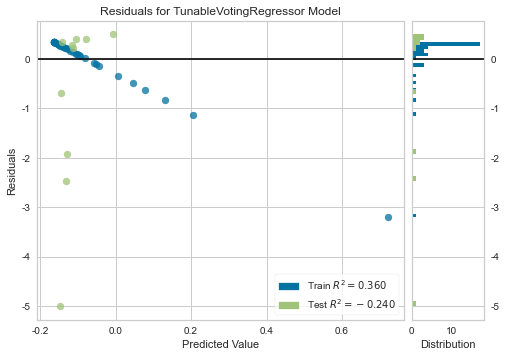

In [43]:
plot_model(blender_specific)

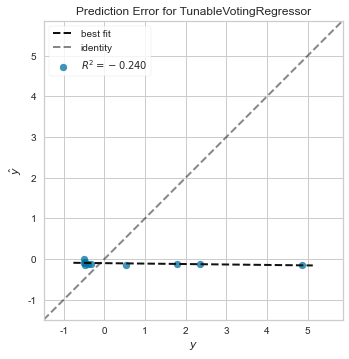

In [46]:
plot_model(blender_specific, plot='error')

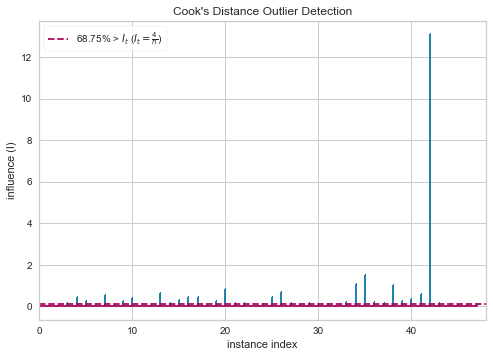

In [47]:
plot_model(blender_specific, plot='cooks')

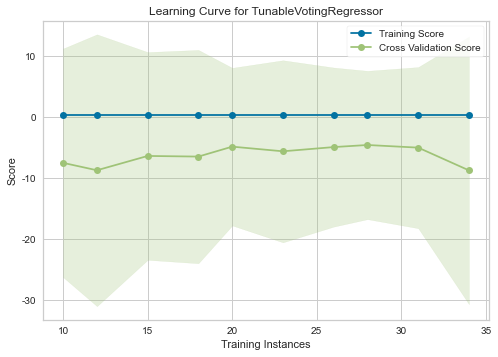

In [48]:
plot_model(blender_specific, plot='learning')

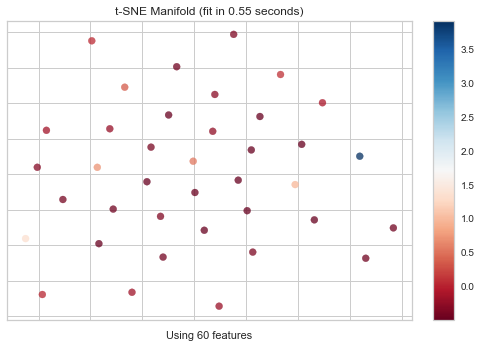

In [50]:
plot_model(blender_specific, plot='manifold')

In [52]:
plot_model(blender_specific, plot='parameter')

,Parameters
estimators,"[('knn', KNeighborsRegressor(algorithm='auto',..."
n_jobs,-1
verbose,False
weights,"[1, 1, 1, 1, 1]"
weight_0,1
weight_1,1
weight_2,1
weight_3,1
weight_4,1


## 2. MMS

In [54]:
train,test=train_test_split(df_mms,test_size=0.2,random_state=42)

In [55]:
exp1=setup(train,target='정비대금_mms',train_size=0.8)

,Description,Value
0,session_id,2847
1,Target,정비대금_mms
2,Original Data,"(48, 35)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,16
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(38, 64)"


In [56]:
best_5=compare_models(sort='RMSE',n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1018,0.0349,0.1389,-6.8713,0.1115,14.6233,1.5540
et,Extra Trees Regressor,0.1018,0.0347,0.1415,-11.1712,0.1146,5.8653,0.0930
gbr,Gradient Boosting Regressor,0.0987,0.0359,0.1415,-11.1765,0.1148,33.2256,0.0280
ada,AdaBoost Regressor,0.1050,0.0377,0.1440,-7.6610,0.1162,17.1697,0.0500
rf,Random Forest Regressor,0.1078,0.0356,0.1457,-10.8560,0.1176,24.8119,0.1340
dt,Decision Tree Regressor,0.0949,0.0388,0.1458,-11.2820,0.1178,2.9812,0.0150
xgboost,Extreme Gradient Boosting,0.1137,0.0429,0.1531,-6.8534,0.1239,19.3076,0.2110
en,Elastic Net,0.1197,0.0365,0.1537,-16.3020,0.1249,32.7790,0.0150
lightgbm,Light Gradient Boosting Machine,0.1197,0.0365,0.1537,-16.3020,0.1249,32.7790,0.0240
llar,Lasso Least Angle Regression,0.1197,0.0365,0.1537,-16.3020,0.1249,32.7790,0.0130


In [57]:
catboost=create_model('catboost',cross_validation=False)
et=create_model('et',cross_validation=False)
gbr=create_model('gbr',cross_validation=False)
ada=create_model('ada',cross_validation=False)
rf=create_model('rf',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1363,0.0629,0.2509,-0.0232,0.1834,4.5155


In [58]:
tuned_catboost=tune_model(catboost,optimize='R2',n_iter=4)
tuned_et=tune_model(et,optimize='R2',n_iter=4)
tuned_gbr=tune_model(gbr,optimize='R2',n_iter=4)
tuned_ada=tune_model(lightgbm,optimize='R2',n_iter=4)
tuned_rf=tune_model(rf,optimize='R2',n_iter=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1530,0.0464,0.2154,-0.5396,0.1797,1.2755
1,0.0135,0.0003,0.0178,-1.3514,0.0175,0.3593
2,0.2715,0.2402,0.4901,-0.3909,0.3373,0.6509
3,0.2467,0.1091,0.3304,-1.1989,0.2676,0.7281
4,0.0300,0.0009,0.0301,-0.2102,0.0294,15.1949
5,0.0651,0.0101,0.1006,-0.2690,0.0898,67.2661
6,0.0136,0.0002,0.0152,-0.1099,0.0148,0.8110
7,0.1071,0.0140,0.1182,-0.3701,0.1051,0.6498
8,0.1255,0.0262,0.1618,-11.2594,0.1362,2.1121
9,0.0115,0.0001,0.0121,-0.0098,0.0118,0.5679


In [59]:
blender_specific = blend_models(estimator_list = [tuned_catboost,tuned_et,tuned_gbr,tuned_ada,tuned_rf], optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1393,0.0307,0.1751,-0.0170,0.1429,2.2890
1,0.0485,0.0024,0.0492,-17.0667,0.0473,1.9426
2,0.2639,0.2243,0.4736,-0.2988,0.3213,0.7239
3,0.1805,0.0646,0.2543,-0.3026,0.2041,0.4825
4,0.0490,0.0030,0.0550,-3.0256,0.0532,32.2510
5,0.0712,0.0083,0.0911,-0.0412,0.0813,134.9189
6,0.0437,0.0023,0.0476,-9.8195,0.0456,2.8387
7,0.1112,0.0151,0.1230,-0.4821,0.1038,0.6013
8,0.0554,0.0035,0.0588,-0.6159,0.0541,0.6587
9,0.0408,0.0018,0.0429,-11.7314,0.0410,2.0675


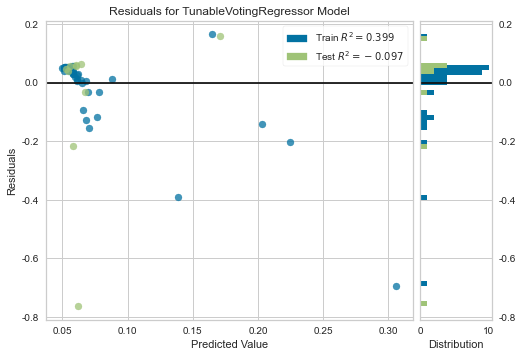

In [60]:
plot_model(blender_specific)

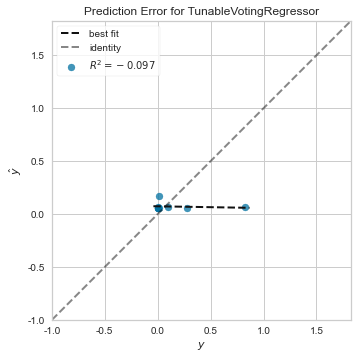

In [61]:
plot_model(blender_specific, plot='error')

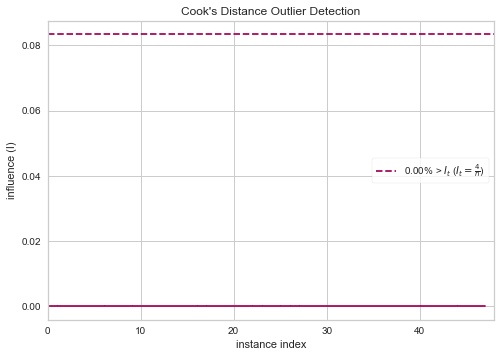

In [62]:
plot_model(blender_specific, plot='cooks')

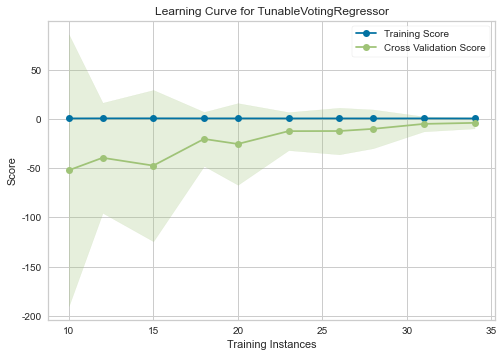

In [63]:
plot_model(blender_specific, plot='learning')

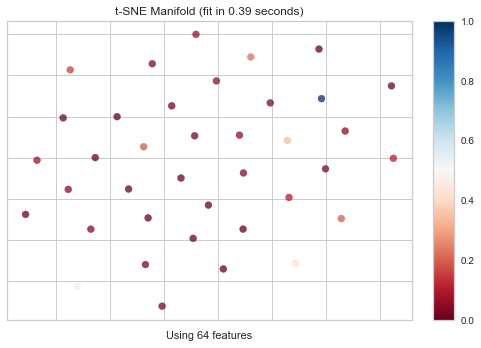

In [64]:
plot_model(blender_specific, plot = 'manifold')

In [66]:
plot_model(blender_specific, plot='parameter')

,Parameters
estimators,"[('catboost', <catboost.core.CatBoostRegressor..."
n_jobs,-1
verbose,False
weights,"[1, 1, 1, 1, 1]"
weight_0,1
weight_1,1
weight_2,1
weight_3,1
weight_4,1


## 3.RS

In [67]:
train,test=train_test_split(df_rs,test_size=0.2,random_state=42)

In [68]:
exp1=setup(train,target='정비대금_rs',train_size=0.8)

,Description,Value
0,session_id,1684
1,Target,정비대금_rs
2,Original Data,"(48, 35)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,17
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(38, 63)"


In [69]:
best_5=compare_models(sort='RMSE',n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,1.9043,7.9586,2.3857,-36.0672,0.7500,42.2939,0.0110
lightgbm,Light Gradient Boosting Machine,1.9043,7.9586,2.3857,-36.0672,0.7500,42.2939,0.0310
br,Bayesian Ridge,1.9410,8.2138,2.3959,-28.6896,0.7546,10.3685,0.0110
knn,K Neighbors Regressor,1.7040,8.9827,2.3969,-9.8042,0.7429,12.1021,0.0120
ada,AdaBoost Regressor,1.6655,8.9042,2.4137,-22.4574,0.7217,23.3083,0.0490
catboost,CatBoost Regressor,1.9086,8.9010,2.5585,-35.4495,0.7860,16.7378,1.3500
dt,Decision Tree Regressor,1.8318,11.3913,2.6572,-7.3028,0.7283,7.0956,0.0120
et,Extra Trees Regressor,1.8734,10.2567,2.6986,-53.9865,0.8249,11.7356,1.7800
xgboost,Extreme Gradient Boosting,2.1461,12.2735,2.9676,-18.4380,0.8682,8.3403,0.1660
gbr,Gradient Boosting Regressor,2.1020,11.1989,2.9827,-55.2019,0.8784,15.6282,0.0250


In [72]:
llar=create_model('llar',cross_validation=False)
lightgbm=create_model('lightgbm',cross_validation=False)
br=create_model('br',cross_validation=False)
knn=create_model('knn',cross_validation=False)
ada=create_model('ada',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7891,0.9334,0.9661,-0.4217,0.4558,9.1879


In [74]:
tuned_knn=tune_model(knn,optimize='R2',n_iter=3)
tuned_ada=tune_model(ada,optimize='R2',n_iter=3)
tuned_llar=tune_model(llar,optimize='R2',n_iter=3)
tuned_lightgbm=tune_model(lightgbm,optimize='R2',n_iter=3)
tuned_br=tune_model(br,optimize='R2',n_iter=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0381,26.3354,5.1318,-0.5772,1.1130,6.6584
1,1.0558,1.7155,1.3098,-0.5724,0.5837,1.4625
2,3.7191,27.0751,5.2034,-130.8258,1.1192,10.8167
3,8.8483,83.5548,9.1408,-2.3469,1.9775,28.4255
4,0.7913,0.8088,0.8994,-12.0813,0.3980,3.0153
5,0.8542,2.0096,1.4176,-77.3794,0.5384,4.1261
6,1.2586,2.7237,1.6504,-0.3896,0.7211,2.6000
7,4.0355,19.0118,4.3602,-6.1248,1.1448,16.2715
8,0.7344,0.5521,0.7431,-53.0055,0.3867,210.7649
9,3.0269,14.7324,3.8383,-1.4489,1.0334,0.5424


In [75]:
blender_specific = blend_models(estimator_list = [tuned_knn,tuned_ada,tuned_llar,tuned_lightgbm,tuned_br], optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0276,23.8586,4.8845,-0.4288,1.1617,5.8481
1,0.7716,1.1596,1.0769,-0.0629,0.4578,1.1721
2,1.8325,5.5149,2.3484,-25.8517,0.6712,7.1581
3,4.9524,39.1520,6.2572,-0.5683,1.4333,8.8683
4,0.7671,0.6378,0.7987,-9.3159,0.3373,3.0402
5,0.7872,1.0758,1.0372,-40.9601,0.4374,6.7694
6,1.2405,2.2739,1.5079,-0.1602,0.5931,2.8991
7,1.5537,2.5434,1.5948,0.0468,0.7312,8.9723
8,0.5159,0.3809,0.6172,-36.2594,0.2068,18.5490
9,3.1422,15.4111,3.9257,-1.5617,1.0554,0.5706


# SS 결정

In [261]:
omp=create_model('omp',cross_validation=False)
en=create_model('en',cross_validation=False)
llar=create_model('llar',cross_validation=False)
lightgbm=create_model('lightgbm',cross_validation=False)
lasso=create_model('lasso',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8689,1.8235,1.3504,-0.076,0.6474,1.0049


In [277]:
tuned_omp=tune_model(omp,optimize='R2',n_iter=10)
tuned_en=tune_model(en,optimize='R2',n_iter=10)
tuned_llar=tune_model(llar,optimize='R2',n_iter=10)
tuned_lightgbm=tune_model(lightgbm,optimize='R2',n_iter=10)
tuned_lasso=tune_model(lasso,optimize='R2',n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6562,0.8715,0.9335,-0.5499,0.2989,0.8518
1,0.2821,0.1160,0.3406,-7.1214,0.1527,0.8122
2,0.3027,0.1060,0.3256,-2.8662,0.2130,1.7597
3,0.4569,0.3077,0.5547,-309.5753,0.1887,1.0313
4,0.2718,0.0783,0.2799,-0.0591,0.1950,2.6471
5,0.5731,0.5106,0.7146,0.4089,0.3835,0.6826
6,0.7978,1.6213,1.2733,-0.1491,0.5498,0.6867
7,0.3588,0.1407,0.3750,-0.0169,0.1966,1.3140
8,1.8238,7.1159,2.6676,-0.1200,0.9248,0.9240
9,0.0710,0.0060,0.0778,-21.7287,0.0678,0.3762


In [290]:
blender_specific = blend_models(estimator_list = [tuned_omp], optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4893,0.5691,0.7544,-0.0122,0.3864,0.6031
1,0.1052,0.0153,0.1236,-0.0690,0.0939,0.4098
2,0.1505,0.0289,0.1699,-0.0530,0.1307,0.8220
3,0.1655,0.0284,0.1685,-27.6507,0.1233,0.3691
4,0.2718,0.0809,0.2844,-0.0936,0.1847,4.1905
5,0.4306,0.2724,0.5219,0.6846,0.1447,0.6379
6,0.2171,0.0898,0.2997,0.9363,0.1218,0.2374
7,0.3604,0.1720,0.4148,-0.2437,0.1300,1.7566
8,1.7938,8.3640,2.8921,-0.3165,0.9579,0.6068
9,0.1221,0.0152,0.1232,-56.0189,0.0989,0.6640


In [383]:
blender_specific = blend_models(estimator_list = [tuned_omp,tuned_llar,tuned_lightgbm,tuned_lasso,tuned_en], optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4297,0.2207,0.4698,0.6075,0.3013,0.7568
1,0.2657,0.0857,0.2928,-5.0003,0.2404,0.7688
2,0.2758,0.0916,0.3026,-2.3399,0.2364,0.9256
3,0.4032,0.1681,0.4100,-168.6356,0.2893,0.9068
4,0.2718,0.0920,0.3034,-0.2446,0.2259,1.9400
5,0.6351,0.5281,0.7267,0.3886,0.4112,0.8290
6,0.7267,1.0998,1.0487,0.2205,0.5113,0.7653
7,0.3601,0.1405,0.3748,-0.0155,0.2446,1.2131
8,1.8837,7.9507,2.8197,-0.2514,1.0484,0.8787
9,0.1033,0.0110,0.1047,-40.1966,0.0921,0.5482


In [373]:
omp=create_model('omp',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8163,1.9604,1.4001,-0.1568,0.5172,0.7874


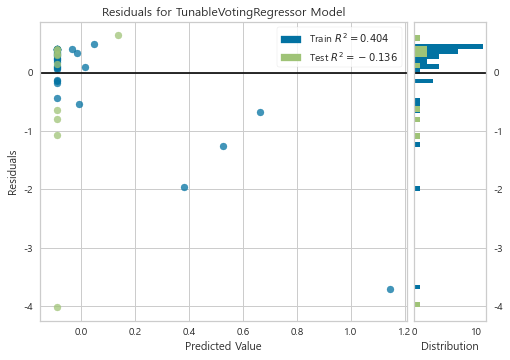

In [384]:
plot_model(blender_specific)

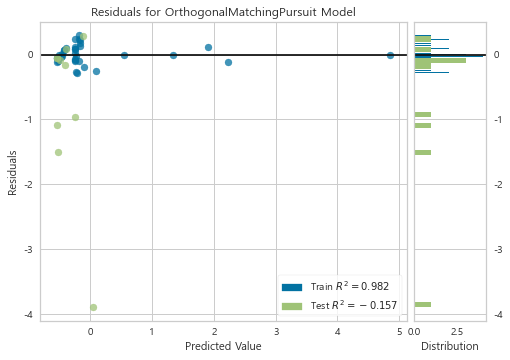

In [374]:
plot_model(omp)
# y값이 극단적으로 높은 것들을 제외하면 예측력이 높은 편

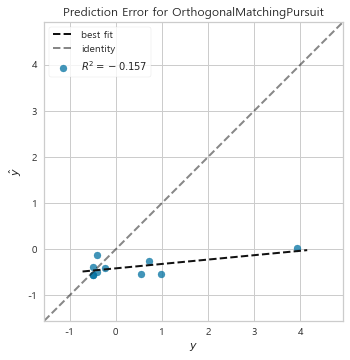

In [375]:
plot_model(omp, plot='error')

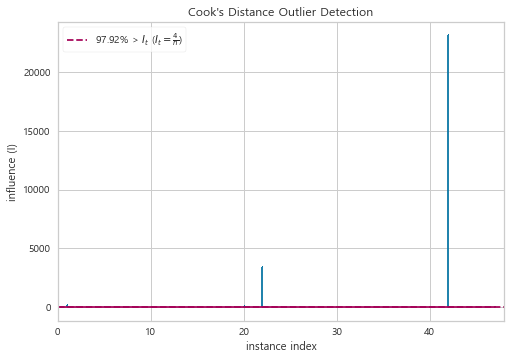

In [376]:
plot_model(omp, plot='cooks')

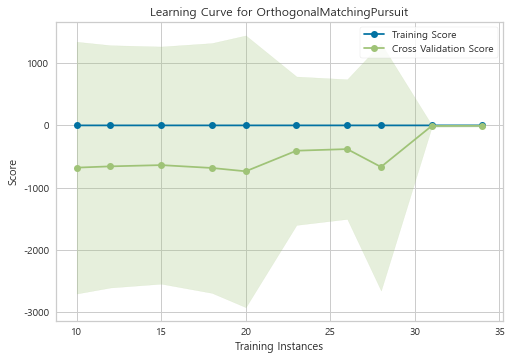

In [377]:
plot_model(omp, plot='learning')

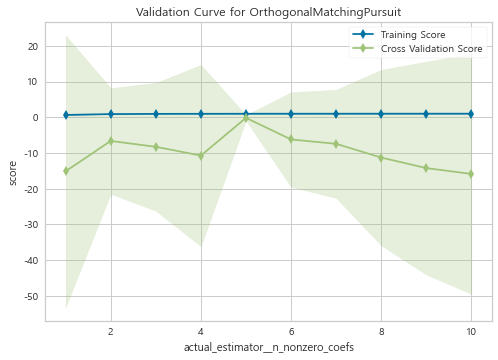

In [378]:
plot_model(omp, plot='vc')

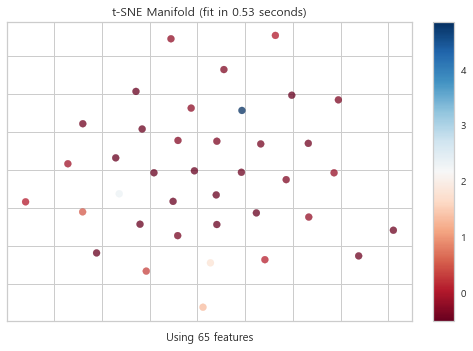

In [379]:
plot_model(omp, plot = 'manifold')

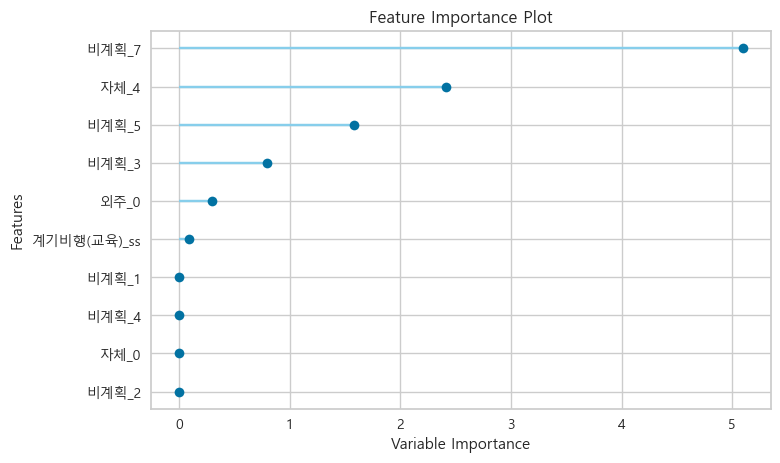

In [386]:
plot_model(omp, plot='feature')

In [381]:
plot_model(omp, plot='parameter')

,Parameters
fit_intercept,True
n_nonzero_coefs,None
normalize,True
precompute,auto
tol,None


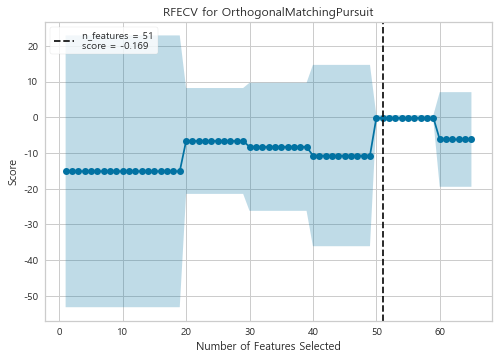

In [382]:
plot_model(omp, plot='rfe')